In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json 
import time
import yfinance as yf
import datetime as dt

In [2]:
#Pre Covid(Jan 2019-Dec 2019)
import yfinance as yf

Target=yf.Ticker("TGT")

print(Target)

# get stock info
Target.info

# get historical market data, here max is 5 years.
Target.history(period="max")


yfinance.Ticker object <TGT>


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1973-02-21 00:00:00-05:00,0.000000,0.208598,0.203631,0.203631,523200,0.0,0.0
1973-02-22 00:00:00-05:00,0.000000,0.203631,0.193698,0.194940,360000,0.0,0.0
1973-02-23 00:00:00-05:00,0.000000,0.196181,0.192456,0.192456,206400,0.0,0.0
1973-02-26 00:00:00-05:00,0.000000,0.192456,0.188731,0.188731,235200,0.0,0.0
1973-02-27 00:00:00-05:00,0.000000,0.187490,0.183765,0.186248,619200,0.0,0.0
...,...,...,...,...,...,...,...
2022-11-07 00:00:00-05:00,161.240005,161.410004,158.000000,159.869995,2424100,0.0,0.0
2022-11-08 00:00:00-05:00,161.320007,164.660004,159.809998,161.619995,3284600,0.0,0.0
2022-11-09 00:00:00-05:00,161.080002,161.589996,152.500000,152.990005,4018400,0.0,0.0


In [3]:
Target_data_df = pd.DataFrame(Target.history(period="max"))
Target_data_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1973-02-21 00:00:00-05:00,0.000000,0.208598,0.203631,0.203631,523200,0.0,0.0
1973-02-22 00:00:00-05:00,0.000000,0.203631,0.193698,0.194940,360000,0.0,0.0
1973-02-23 00:00:00-05:00,0.000000,0.196181,0.192456,0.192456,206400,0.0,0.0
1973-02-26 00:00:00-05:00,0.000000,0.192456,0.188731,0.188731,235200,0.0,0.0
1973-02-27 00:00:00-05:00,0.000000,0.187490,0.183765,0.186248,619200,0.0,0.0
...,...,...,...,...,...,...,...
2022-11-07 00:00:00-05:00,161.240005,161.410004,158.000000,159.869995,2424100,0.0,0.0
2022-11-08 00:00:00-05:00,161.320007,164.660004,159.809998,161.619995,3284600,0.0,0.0
2022-11-09 00:00:00-05:00,161.080002,161.589996,152.500000,152.990005,4018400,0.0,0.0


In [4]:
Target_data_df.to_csv("Target.csv")


In [5]:
Target_data_df.reset_index(inplace=True)
Target_data_df['index'] = Target_data_df.index
Target_data_df['Date'] = pd.to_datetime(Target_data_df['Date'], format='%Y-%m-%d')
Target_data_df = Target_data_df[["Date","Close"]]
Target_data_df

,Date,Close
0,1973-02-21 00:00:00-05:00,0.203631
1,1973-02-22 00:00:00-05:00,0.194940
2,1973-02-23 00:00:00-05:00,0.192456
3,1973-02-26 00:00:00-05:00,0.188731
4,1973-02-27 00:00:00-05:00,0.186248
...,...,...
12539,2022-11-07 00:00:00-05:00,159.869995
12540,2022-11-08 00:00:00-05:00,161.619995
12541,2022-11-09 00:00:00-05:00,152.990005
12542,2022-11-10 00:00:00-05:00,164.380005


In [6]:
Target_pre_covid_df = Target_data_df.loc[((Target_data_df['Date'].dt.year == 2019))]
Target_pre_covid_df.sort_values(by=['Date'])


,Date,Close
11569,2019-01-02 00:00:00-05:00,61.350277
11570,2019-01-03 00:00:00-05:00,60.509983
11571,2019-01-04 00:00:00-05:00,61.341053
11572,2019-01-07 00:00:00-05:00,64.342056
11573,2019-01-08 00:00:00-05:00,64.277443
...,...,...
11816,2019-12-24 00:00:00-05:00,122.483566
11817,2019-12-26 00:00:00-05:00,122.807533
11818,2019-12-27 00:00:00-05:00,123.112427
11819,2019-12-30 00:00:00-05:00,122.807533


In [7]:
#Create a dataframe for Target pre-covid stock data (Jan 2019 - Dec 2019) By Month
monthly_close_pre_covid_df = pd.DataFrame(Target_pre_covid_df.groupby(Target_pre_covid_df.Date.dt.month)['Close'].mean())\
                        .reset_index()\
                        .rename(columns={'Date': 'Month'})

#Add Store and timeframe column

monthly_close_pre_covid_df['Store'] = 'Target'
monthly_close_pre_covid_df['Timeframe'] = 'Pre-Covid'

monthly_close_pre_covid_df

,Month,Close,Store,Timeframe
0,1,64.355265,Target,Pre-Covid
1,2,66.886419,Target,Pre-Covid
2,3,72.018151,Target,Pre-Covid
3,4,75.263148,Target,Pre-Covid
4,5,70.814690,Target,Pre-Covid
5,6,81.338560,Target,Pre-Covid
6,7,82.330829,Target,Pre-Covid
7,8,86.082063,Target,Pre-Covid
8,9,101.976587,Target,Pre-Covid
9,10,104.089404,Target,Pre-Covid


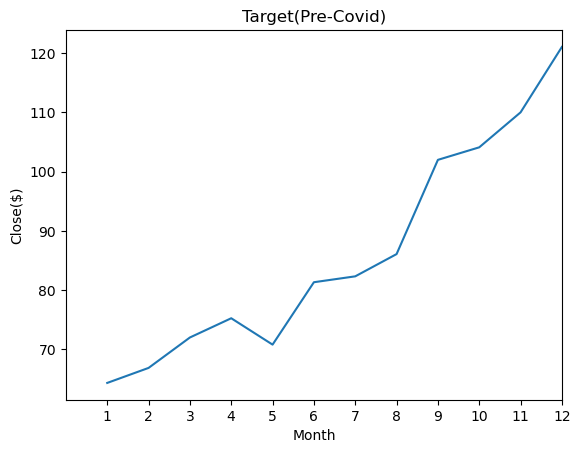

In [8]:
x = monthly_close_pre_covid_df['Month']
y = monthly_close_pre_covid_df['Close']

plt.plot(x, y)
plt.xlim(0,12,1)
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.xlabel("Month")
plt.ylabel("Close($)")
plt.title("Target(Pre-Covid)");

In [9]:
#Dateframe Before Vaccine(Jan 2020 - Nov 2020)
Target_before_vaccine_df = Target_data_df.loc[((Target_data_df['Date'] >= '2020-01-01') & (Target_data_df['Date'] < '2020-12-01'))]
Target_before_vaccine_df.sort_values(by=['Date'])

,Date,Close
11821,2020-01-02 00:00:00-05:00,120.120598
11822,2020-01-03 00:00:00-05:00,118.872414
11823,2020-01-06 00:00:00-05:00,117.748123
11824,2020-01-07 00:00:00-05:00,117.957726
11825,2020-01-08 00:00:00-05:00,117.576599
...,...,...
12047,2020-11-23 00:00:00-05:00,172.601303
12048,2020-11-24 00:00:00-05:00,172.892944
12049,2020-11-25 00:00:00-05:00,174.798203
12050,2020-11-27 00:00:00-05:00,174.749588


In [10]:
#Create a dataframe for Target before Vaccine stock data (Jan 2020 - Nov 2020) By Month
monthly_close_before_vaccine_df = pd.DataFrame(Target_before_vaccine_df.groupby(Target_before_vaccine_df.Date.dt.month)['Close'].mean())\
                        .reset_index()\
                        .rename(columns={'Date': 'Month'})

#Add Store and timeframe column

monthly_close_before_vaccine_df['Store'] = 'Target'
monthly_close_before_vaccine_df['Timeframe'] = 'Before Vaccine'

monthly_close_before_vaccine_df

,Month,Close,Store,Timeframe
0,1,113.334337,Target,Before Vaccine
1,2,109.311139,Target,Before Vaccine
2,3,96.364967,Target,Before Vaccine
3,4,100.702813,Target,Before Vaccine
4,5,112.906793,Target,Before Vaccine
5,6,115.248157,Target,Before Vaccine
6,7,116.616497,Target,Before Vaccine
7,8,136.371380,Target,Before Vaccine
8,9,145.346244,Target,Before Vaccine
9,10,155.645202,Target,Before Vaccine


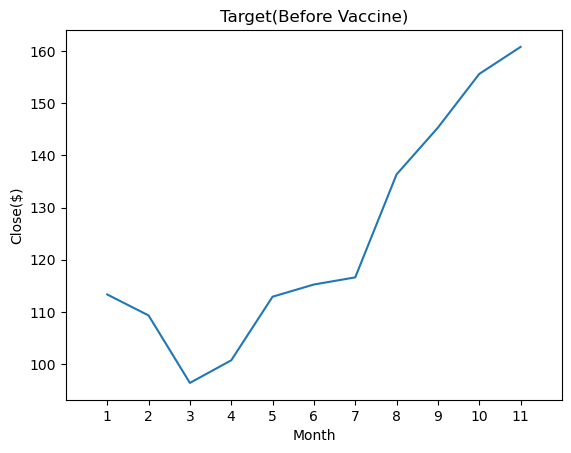

In [11]:
x = monthly_close_before_vaccine_df['Month']
y = monthly_close_before_vaccine_df['Close']

plt.plot(x, y)
plt.xlim(0,12,1)
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.xlabel("Month")
plt.ylabel("Close($)")
plt.title("Target(Before Vaccine)");

In [12]:
#Dateframe After Vaccine(Dec 2020 - Dec 2021)
Target_after_vaccine_df = Target_data_df.loc[((Target_data_df['Date'] > '2020-11-30') & (Target_data_df['Date'] <= '2021-12-31'))]
Target_after_vaccine_df.sort_values(by=['Date'])

,Date,Close
12052,2020-12-01 00:00:00-05:00,174.049713
12053,2020-12-02 00:00:00-05:00,171.483414
12054,2020-12-03 00:00:00-05:00,170.035065
12055,2020-12-04 00:00:00-05:00,170.141968
12056,2020-12-07 00:00:00-05:00,168.081177
...,...,...
12321,2021-12-27 00:00:00-05:00,220.832932
12322,2021-12-28 00:00:00-05:00,221.631104
12323,2021-12-29 00:00:00-05:00,224.597229
12324,2021-12-30 00:00:00-05:00,228.529053


In [13]:
#Create a dataframe for Target After Vaccine stock data (Jan 2020 - Nov 2020) By Month
monthly_close_after_vaccine_df = pd.DataFrame(Target_after_vaccine_df.groupby(Target_after_vaccine_df.Date.dt.month)['Close'].mean())\
                        .reset_index()\
                        .rename(columns={'Date': 'Month'})

#Add Store and timeframe column

monthly_close_after_vaccine_df['Store'] = 'Target'
monthly_close_after_vaccine_df['Timeframe'] = 'After Vaccine'

monthly_close_after_vaccine_df

,Month,Close,Store,Timeframe
0,1,183.985312,Target,After Vaccine
1,2,183.959921,Target,After Vaccine
2,3,179.468114,Target,After Vaccine
3,4,200.505213,Target,After Vaccine
4,5,211.202666,Target,After Vaccine
5,6,229.145640,Target,After Vaccine
6,7,247.994178,Target,After Vaccine
7,8,250.762921,Target,After Vaccine
8,9,237.770827,Target,After Vaccine
9,10,239.072301,Target,After Vaccine


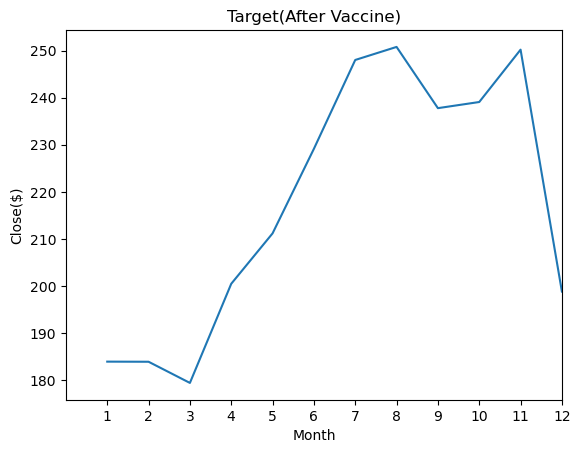

In [14]:
x = monthly_close_after_vaccine_df['Month']
y = monthly_close_after_vaccine_df['Close']
plt.plot(x, y)
plt.xlim(0,12,1)
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.xlabel("Month")
plt.ylabel("Close($)")
plt.title("Target(After Vaccine)");


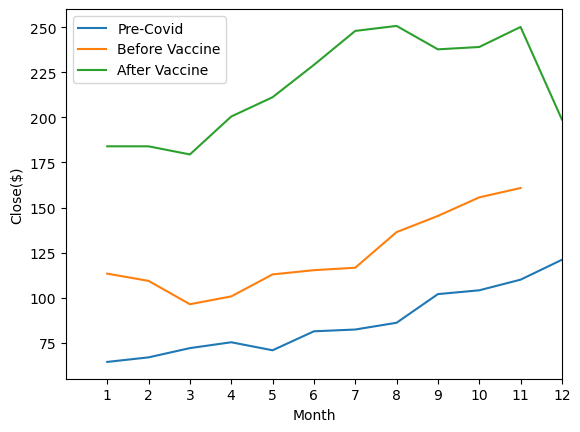

In [15]:
frames = [monthly_close_pre_covid_df, monthly_close_before_vaccine_df, monthly_close_after_vaccine_df]

Target_FINAL_df = pd.concat(frames)

fig,ax = plt.subplots()

for timeframe in ['Pre-Covid', 'Before Vaccine', 'After Vaccine']:
    ax.plot(Target_FINAL_df[Target_FINAL_df.Timeframe==timeframe].Month,Target_FINAL_df[Target_FINAL_df.Timeframe==timeframe].Close,label=timeframe)

plt.xlim(0,12,1)
plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.xlabel("Month")
plt.ylabel("Close($)")

ax.legend(loc='best')